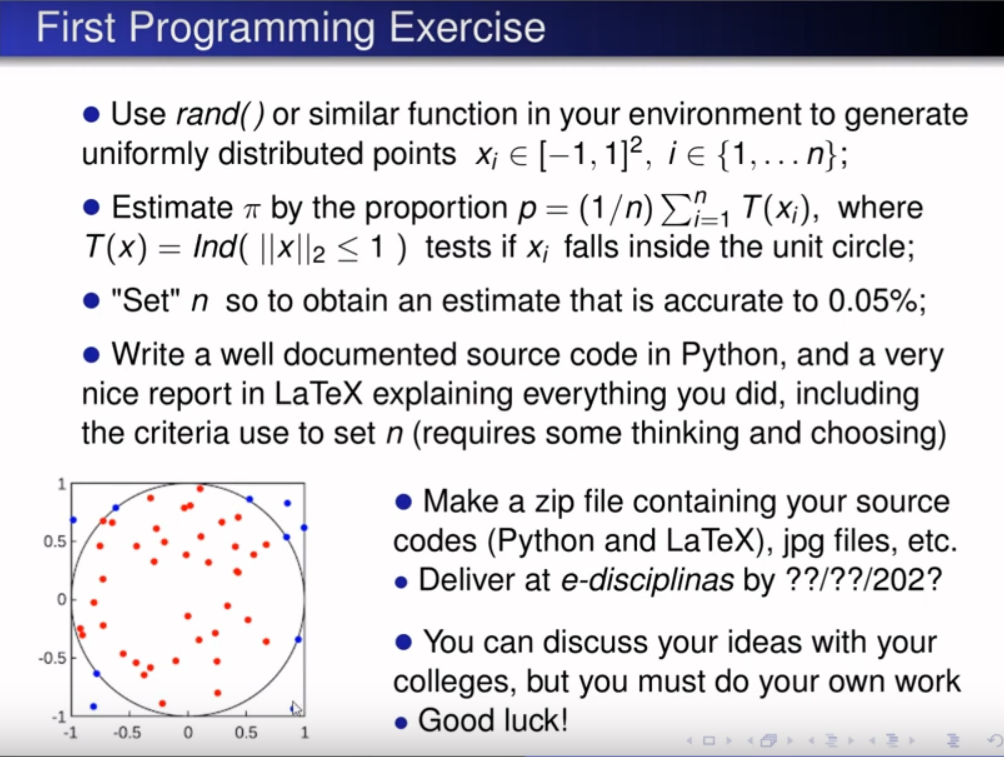

ep1
- estimação do PI pelo método de monte carlo
- usar python usando numpy e SciPy
- usar rand() ou similar, para gerar uma distribuição uniforme [-1,1]
(geração do quadrado uniforme de -1 a 1
- estimar pi pela proporção p = (1/n) sum (T(xi)) onde T(x) = Ind (mod(x2) <= 1) teste se xi cai dentro do círculo de unidade 1
- "set" n de uma forma à obter uma estimativa com acurácia de 0.05%
(sem saber o valor de pi)
- Escrever um código bem escrito e documentado em Python e um relatório em LaTex explicando tudo o que foi feito, incluindo critérios para setar o n (requer pensar e fazer algumas escolhas)
- enviar compactado todos os arquivos e entregar no e-disciplinas

  




In [8]:
#bibliotecas
import random
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle


In [9]:
def gera_ponto():
  """
  gera um ponto uniformemente aleatorio no quadrado -1, 1
  """

  x = random.uniform(-1,1)
  y = random.uniform(-1,1)

  return x, y

In [10]:
def dentro_do_circulo (ponto):
  """
  Retorna true se o ponto(s) esta dentro do circulo de raio 1,
  false se não estiver.
  """
  return ponto[0]**2 + ponto[1]**2 <= 1


In [11]:
def gera_pontos(n):
  """
  Funcao para gerar dois array com n pares de pontos 
  """

  x = np.random.uniform(low=-1,high=1, size=n)
  y = np.random.uniform(low=-1,high=1, size=n)

  return x, y

In [37]:
#Escreva seu nome e numero USP
INFO = {11811012:"Vinícius da Costa Collaço"}
def estima_pi(Seed = None):
    """
    Esta funcao deve retornar a sua estimativa para o valor de PI
    Escreva o seu codigo nas proximas linhas
    """
    random.seed(Seed)
    np.random.seed(Seed)

    n = 4198742 #n calculado estatisticamente

    pontos = gera_pontos(int(n))
    pontos_dentro = dentro_do_circulo(pontos)
    pi_estimado = 4*(sum(np.where(pontos_dentro == True,1,0))/n)
    
    return pi_estimado #Retorne sua estimativa


In [19]:
def gera_grafico(n,Seed = None):
  #pontos e calculo de pi
  np.random.seed(Seed)
  pontos = gera_pontos(int(n))
  pontos_dentro = dentro_do_circulo(pontos)
  dentro_fora = np.where(pontos_dentro == True,'dentro do círculo','fora do círculo')
  pi_estimado = 4*(sum(np.where(pontos_dentro == True,1,0))/n)
  
  #grafico
  plt.figure(figsize=(9,9))
  ax = plt.gca()
  circle = Circle((0, 0), 1, facecolor='none',edgecolor='k')
  ax.add_patch(circle)
  plt.axis([-1, 1, -1, 1])
  plt.title ('Estimativa do $\pi$ = %.4f, para n = %d'%(pi_estimado,n))
  sns.scatterplot(pontos[0],pontos[1],hue=dentro_fora,legend=False,markers='.',s=20)
  plt.savefig('estima_pi, n = %d' %(n))

In [43]:
def dentro_do_erro (n, acuracia, Seed = None):
  """
  funcao para mostrar quantas estimativas do pi estao dentro 
  da acuracia definida
  """
  lista = []
  semente = Seed
  for i in range (n):
    lista.append((abs(estima_pi(semente)-pi)/pi) < acuracia)
    semente += 1
  lista_array = np.array(lista)  
  soma_true = sum(np.where(lista_array == True,1,0))
  return (soma_true/n)

In [46]:
dentro_do_erro(1000, 0.0005, Seed=39)

0.946